# Chapter 9. Plotting and Visualization


In [1]:
%matplotlib inline

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

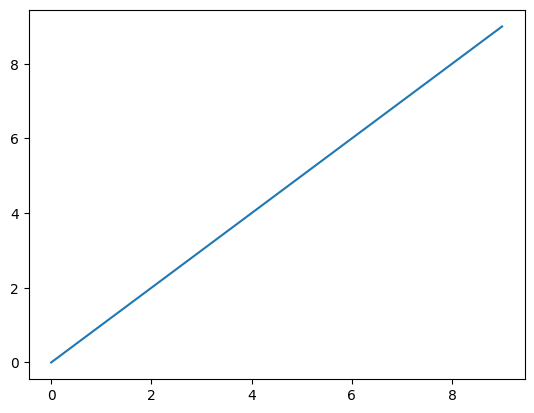

In [3]:
data = np.arange (10)
data
plt.plot (data)

## Figures and Subplots
Plots in matplotlib reside within a Figure object. You can create a new figure with plt.figure ()

In [4]:
fig = plt.figure () # more options: figsize, etc.

<Figure size 640x480 with 0 Axes>

In [5]:
ax1 = fig.add_subplot (2,2,1)
# This means that the figure should be 2x2 (4 plots in total), and we are selecting the first of the four subplots. 

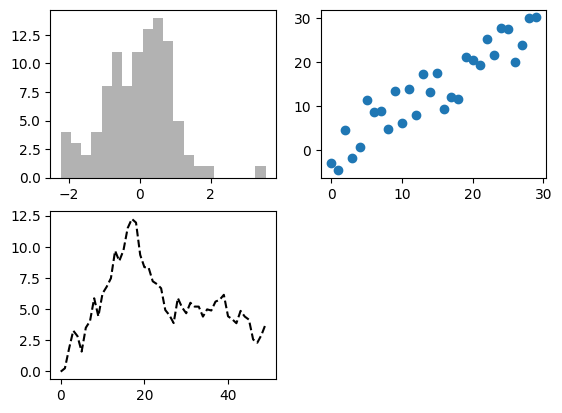

In [6]:
# Code for the same graph has to be in the same block
fig = plt.figure ()
ax1 = fig.add_subplot (2,2,1)
ax2 = fig.add_subplot (2,2,2)
ax3 = fig.add_subplot (2,2,3)
ax3.plot (np.random.standard_normal (50).cumsum (), color = "black",linestyle = "dashed");
ax1.hist (np.random.standard_normal (100), bins =20, color = "black",alpha =0.3); # Add semicolon to avoid other output 
ax2.scatter (np.arange (30), np.arange(30)+3*np.random.standard_normal (30));

### Adjusting the spacing around subplots 

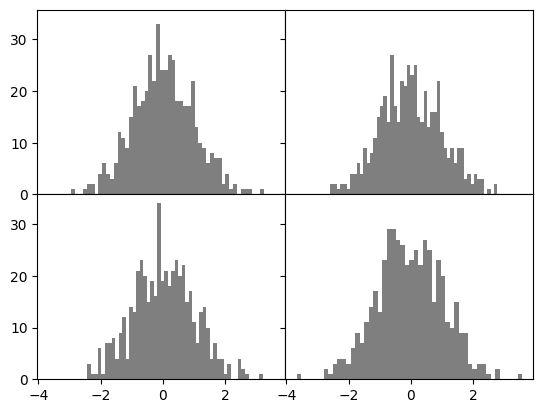

In [7]:
fig, axes = plt.subplots (2,2,sharex = True, sharey = True)
for i in range (2): 
    for j in range (2): 
        axes [i,j].hist (np.random.standard_normal (500),bins =50, color = "black",alpha =0.5)
fig.subplots_adjust ( wspace =0, hspace =0)
# still need to fix the labels

### Colors, Markers, and Line Styles 

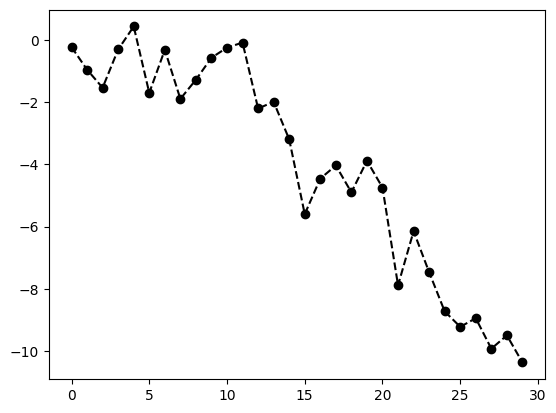

In [8]:
fig = plt.figure () # You need to create the figure first
ax =fig.add_subplot ()
ax.plot (np.random.standard_normal (30).cumsum (), color = "black", linestyle ="dashed", marker = "o");

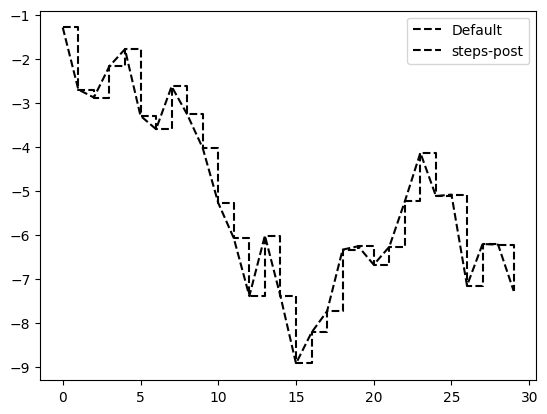

In [9]:
# For line plots, you will notice that subsequent point are linearly interpolated by default. This can be altered with drawstyle option 
fig = plt.figure()
ax = fig.add_subplot ()
data = np.random.standard_normal (30).cumsum()

ax.plot (data, color = "black", linestyle = "dashed",label = "Default");
ax.plot (data, color = "black", linestyle = "dashed", drawstyle = "steps-post", label = "steps-post")
ax.legend () # We are able to do this since we passed label to each ax

## Ticks, Labels, and Legends 
### Setting the title, axis labels, ticks, and tick labels

[Text(0.5, 1.0, 'My first matplotlib plot'), Text(0.5, 0, 'Stages')]

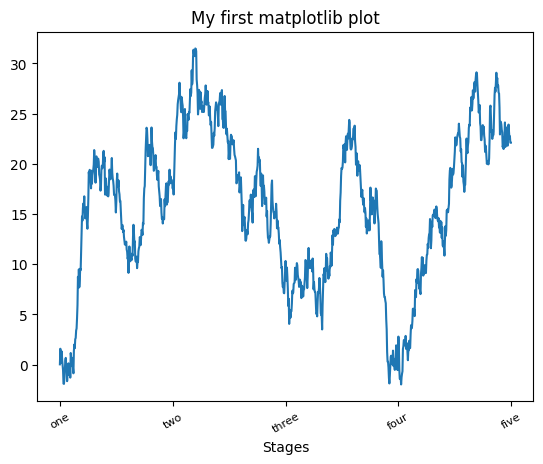

In [10]:
fig, ax = plt.subplots ()
ax.plot (np.random.standard_normal (1000).cumsum());
# ticks are the marks and labels along the axes that show you the scale and values
ticks = ax.set_xticks ([0,250,500,750, 1000])
labels = ax.set_xticklabels (["one","two","three","four","five"],
                            rotation =30, fontsize =8)
## ax.set_xlabel ("Stages");
## ax.set_title ("My first matplotlib plot")
ax.set (title = "My first matplotlib plot", xlabel = "Stages")

#### Adding legends

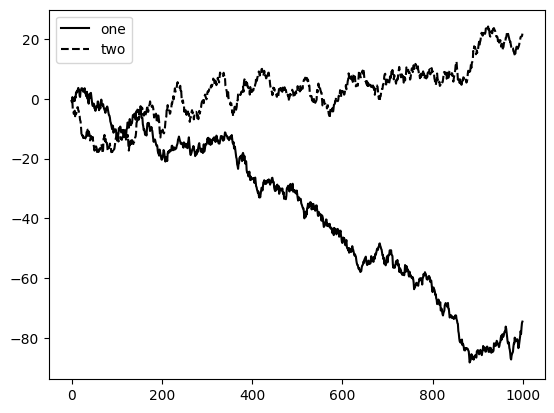

In [11]:
## The easiest way to add legends is to pass the label arguments when adding each piece of the plot
fig, ax = plt.subplots ()

ax.plot (np.random.randn(1000).cumsum (), color = "black",label = "one");
ax.plot (np.random.randn (1000).cumsum (), color = "black", linestyle = "dashed", label ="two");
ax.legend()

### Annotations and Drawing on a Subplot

Text(0.5, 1.0, 'Important dates in the 2008-2009 financial crisis')

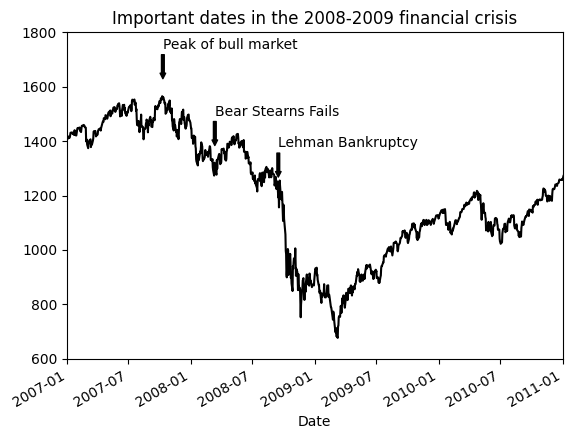

In [12]:
from datetime import datetime
fig, ax = plt.subplots ()

data = pd.read_csv ( "/Users/wangxinyuan/Desktop/Dataset/spx.csv", index_col =0, parse_dates = True
) # parse_dates tells python to convert date-like strings into datetime objects when reading in a dataset.
spx = data ["SPX"]
spx.plot (ax=ax, color ="black");

crisis_data = [
    (datetime (2007,10,11),"Peak of bull market"),
    (datetime (2008,3,12), "Bear Stearns Fails"),
    (datetime (2008,9,15), "Lehman Bankruptcy")
]
for date, label in crisis_data: 
    ax.annotate (label, xy= (date, spx.asof(date)+75),
                xytext = (date,spx.asof(date)+225),
                 arrowprops =dict (facecolor = "black",headwidth = 4, width =2,headlength=4),
                 horizontalalignment ="left", verticalalignment = "top"
                )
## zoom in 
ax.set_xlim (["1/1/2007","1/1/2011"])
ax.set_ylim ([600,1800])
ax.set_title ("Important dates in the 2008-2009 financial crisis")

## Plotting with pandas and seaborn
### Line Plots

In [13]:
# Series and DataFrame have a plot attribute for making some basic types. By default, plot () makes line plots
s = pd.Series (np.random.standard_normal (10).cumsum(), index = np.arange (0, 100, 10))
s

0     0.698519
10    0.452300
20    0.361837
30   -0.684191
40   -1.548051
50   -1.663677
60   -1.112956
70   -1.367484
80    0.262095
90   -0.086356
dtype: float64

<Axes: >

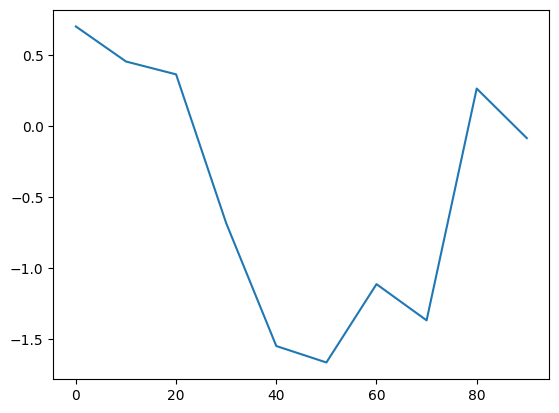

In [14]:
s.plot ()

<Axes: >

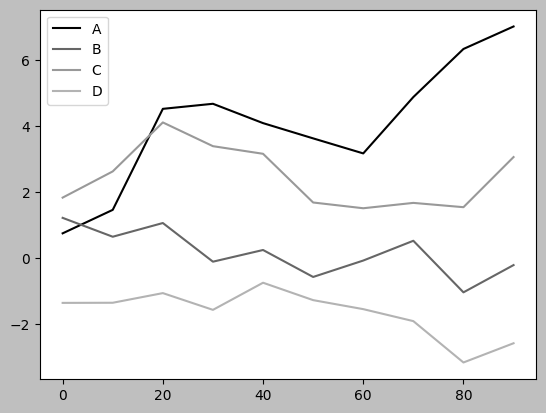

In [15]:
# DataFrame's plot method plots each of its columns as a different line on the same subplot, creating a legend automatically
df = pd.DataFrame (np.random.standard_normal ((10,4)).cumsum(0),
                  columns = ["A","B","C","D"],
                  index = np.arange (0,100,10))
plt.style.use ("grayscale")
df.plot ()

### Bar Plots

<Axes: >

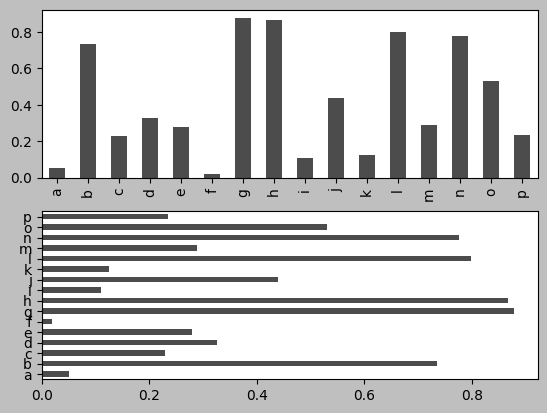

In [16]:
fig, axes = plt.subplots (2,1)
data = pd.Series (np.random.uniform (size =16), index = list ("abcdefghijklmnop"))
data.plot.bar(ax=axes [0], color = "black",alpha = 0.7)
data.plot.barh(ax=axes [1],color = "black",alpha =0.7)

In [17]:
# DataFrame
df = pd.DataFrame (np.random.uniform (size = (6,4)),
                   index = ["one","two","three","four","five","six"],
                   columns =pd.Index(["A","B","C","D"], name = "Genus") 
                  )
df

Genus,A,B,C,D
one,0.937359,0.007801,0.618325,0.553930
two,0.070596,0.825899,0.309358,0.360354
three,0.650701,0.075883,0.380943,0.743521
four,0.461809,0.306576,0.422238,0.814076
five,0.884815,0.914303,0.195955,0.884297
six,0.525302,0.573018,0.658398,0.919896


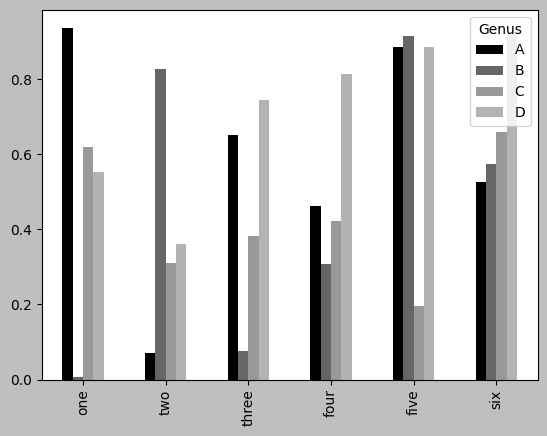

In [18]:
df.plot.bar (); 

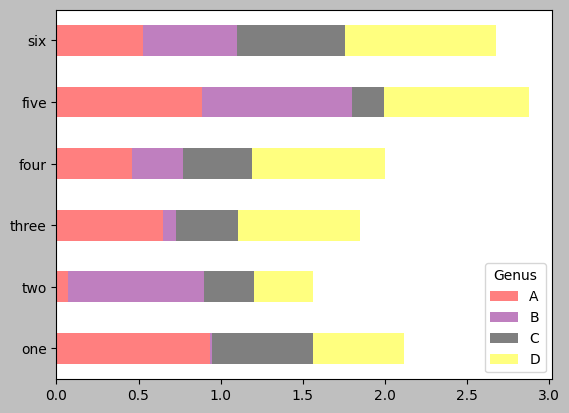

In [36]:
df.plot.barh(stacked = True, alpha =0.5, color = ["red","purple","black","yellow"]);

## Use Seaborn
With data that requires aggregation or summarization before making a plot, using the seaborn package can make things much simpler. 

In [37]:
# We want to make a stacked plot showing the percentage of data points for each party size for each day. 
tips = pd.read_csv ("/Users/wangxinyuan/Desktop/Dataset/tips.csv")
tips.head()

,total_bill,tip,smoker,day,time,size
0,16.99,1.01,No,Sun,Dinner,2
1,10.34,1.66,No,Sun,Dinner,3
2,21.01,3.50,No,Sun,Dinner,3
3,23.68,3.31,No,Sun,Dinner,2
4,24.59,3.61,No,Sun,Dinner,4


In [38]:
party_counts = pd.crosstab (tips ["day"],tips ["size"])
party_counts = party_counts.reindex (index =["Thur","Fri","Sat","Sun"])
party_counts 

size,1,2,3,4,5,6
day,,,,,,
Thur,1,48,4,5,1,3
Fri,1,16,1,1,0,0
Sat,2,53,18,13,1,0
Sun,0,39,15,18,3,1


In [39]:
party_counts = party_counts.loc [:, 2: 5]
party_pcts = party_counts.div (party_counts.sum(axis="columns"), axis ="index")
party_pcts

size,2,3,4,5
day,,,,
Thur,0.827586,0.068966,0.086207,0.017241
Fri,0.888889,0.055556,0.055556,0.000000
Sat,0.623529,0.211765,0.152941,0.011765
Sun,0.520000,0.200000,0.240000,0.040000


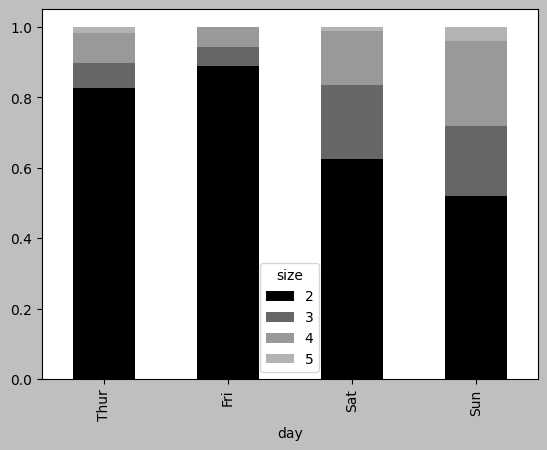

In [40]:
party_pcts.plot.bar (stacked = True);

In [41]:
# Let us look at how to do this using seaborn 
import seaborn as sns
tips ["tip_pct"] = tips ["tip"]/(tips ["total_bill"]-tips ["tip"])
tips.head ()

,total_bill,tip,smoker,day,time,size,tip_pct
0,16.99,1.01,No,Sun,Dinner,2,0.063204
1,10.34,1.66,No,Sun,Dinner,3,0.191244
2,21.01,3.50,No,Sun,Dinner,3,0.199886
3,23.68,3.31,No,Sun,Dinner,2,0.162494
4,24.59,3.61,No,Sun,Dinner,4,0.172069


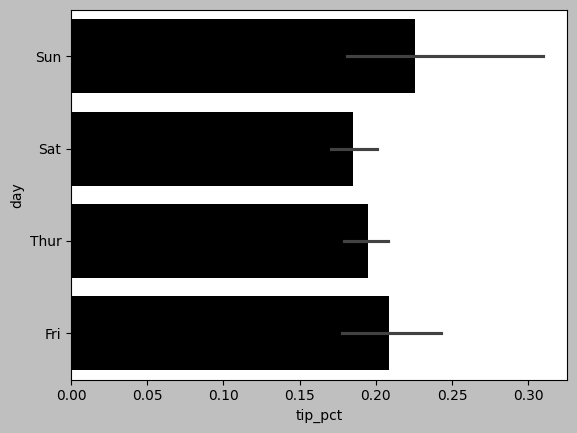

In [42]:
sns.barplot (x="tip_pct", y= "day", data = tips, orient = "h");

### Histograms and Desity Plots 

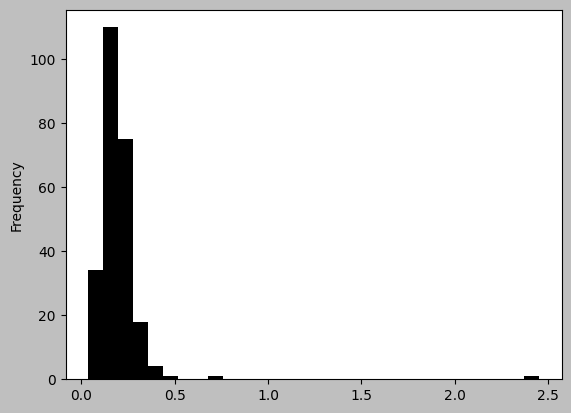

In [44]:
tips ["tip_pct"].plot.hist (bins =30);

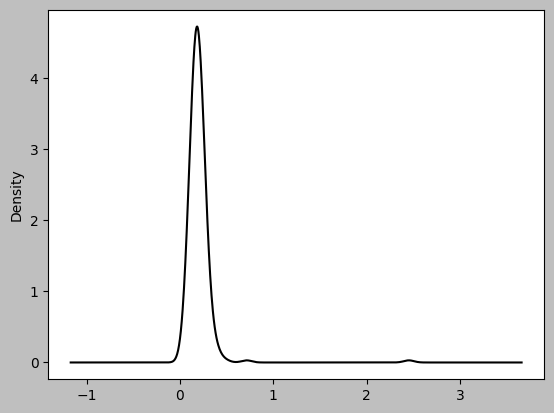

In [46]:
tips ["tip_pct"].plot.density ();

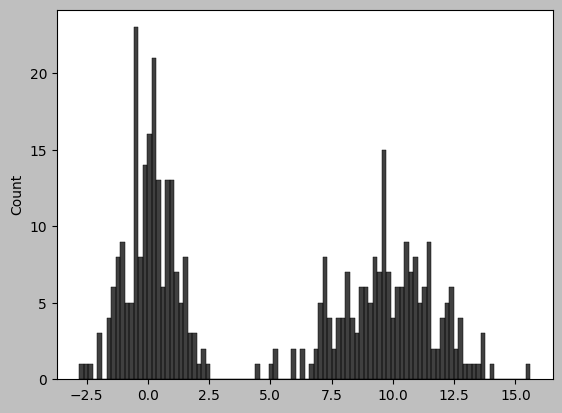

In [47]:
# Consider a bimodal distribution consisting of draws from two different standard normal distributions. 
comp1 = np.random.standard_normal (200)
comp2 = 10+ 2*np.random.standard_normal (200)
values = pd.Series (np.concatenate ([comp1, comp2]))
sns.histplot (values, bins =100, color = "black");

### Scatter or Point Plots


In [50]:
macro = pd.read_csv ("/Users/wangxinyuan/Desktop/Dataset/macrodata.csv")
data = macro [["cpi","m1","tbilrate","unemp"]]
trans_data = np.log (data).diff().dropna ()
trans_data.tail ()

,cpi,m1,tbilrate,unemp
198,-0.007904,0.045361,-0.396881,0.105361
199,-0.021979,0.066753,-2.277267,0.139762
200,0.002340,0.010286,0.606136,0.160343
201,0.008419,0.037461,-0.200671,0.127339
202,0.008894,0.012202,-0.405465,0.042560


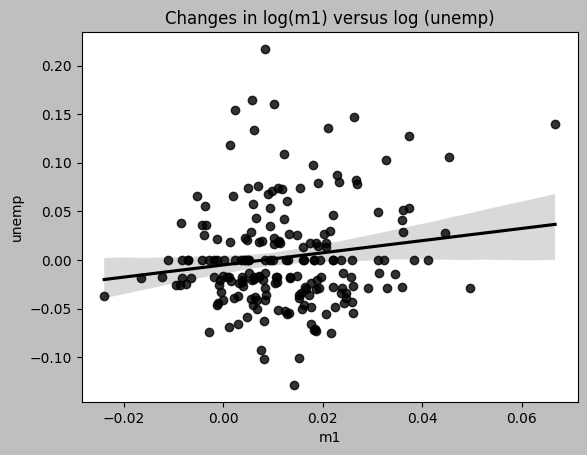

In [53]:
# We can then use seaborn's regplot method, which makes a scatter plot and fits a linear regression line 
ax = sns.regplot (x="m1",y="unemp",data =trans_data)
ax.set_title ("Changes in log(m1) versus log (unemp)");

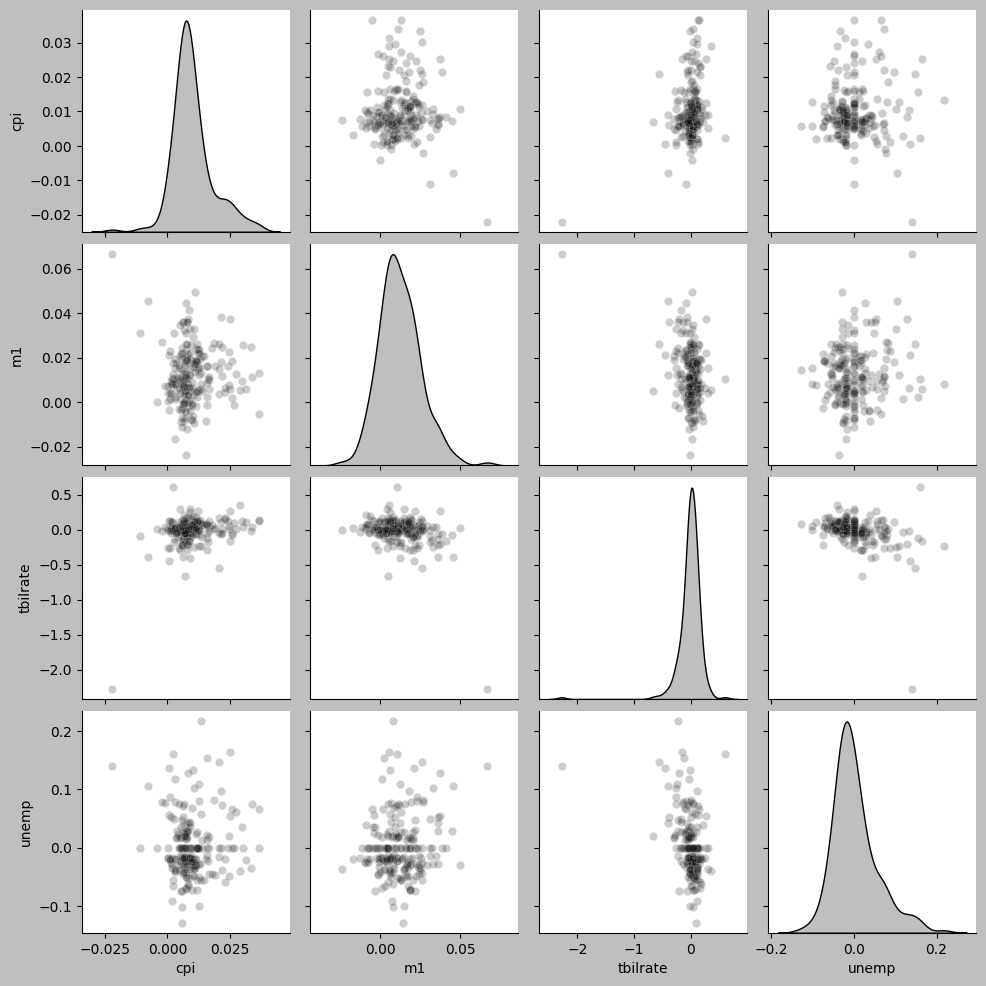

In [54]:
# pairplot function that supports placing histograms or density estimates of each variable along the diagonal 
sns.pairplot (trans_data, diag_kind = "kde", plot_kws = {"alpha": 0.2})

### Facet Grids and Categorical Data 


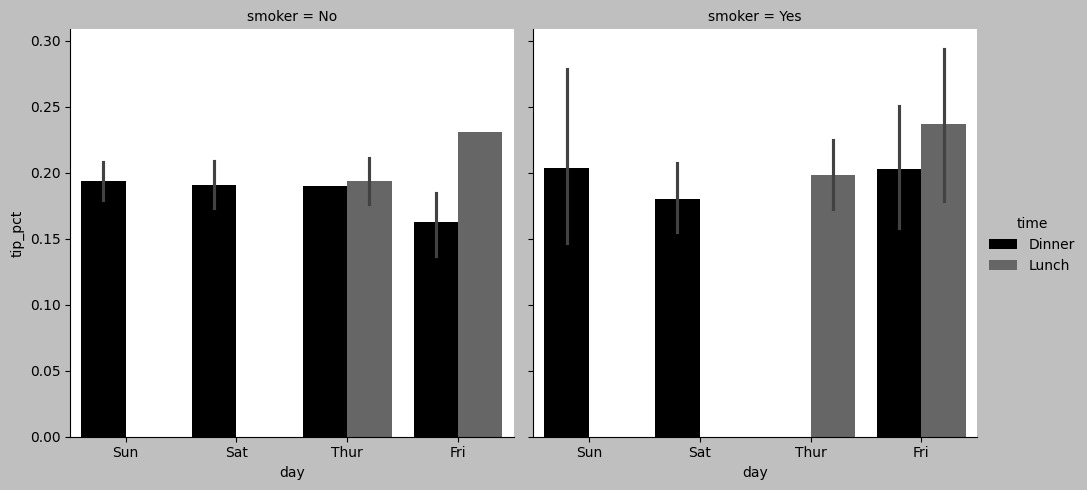

In [55]:
# One way to visualize data with many categorical variables is to use a facet grid, which is a 2-D layout of plots where the data is split across the plots on each axis based on the distinct values of a certain variable.

sns.catplot (x="day",y="tip_pct",hue = "time",col= "smoker", kind = "bar", data = tips [tips.tip_pct<1])

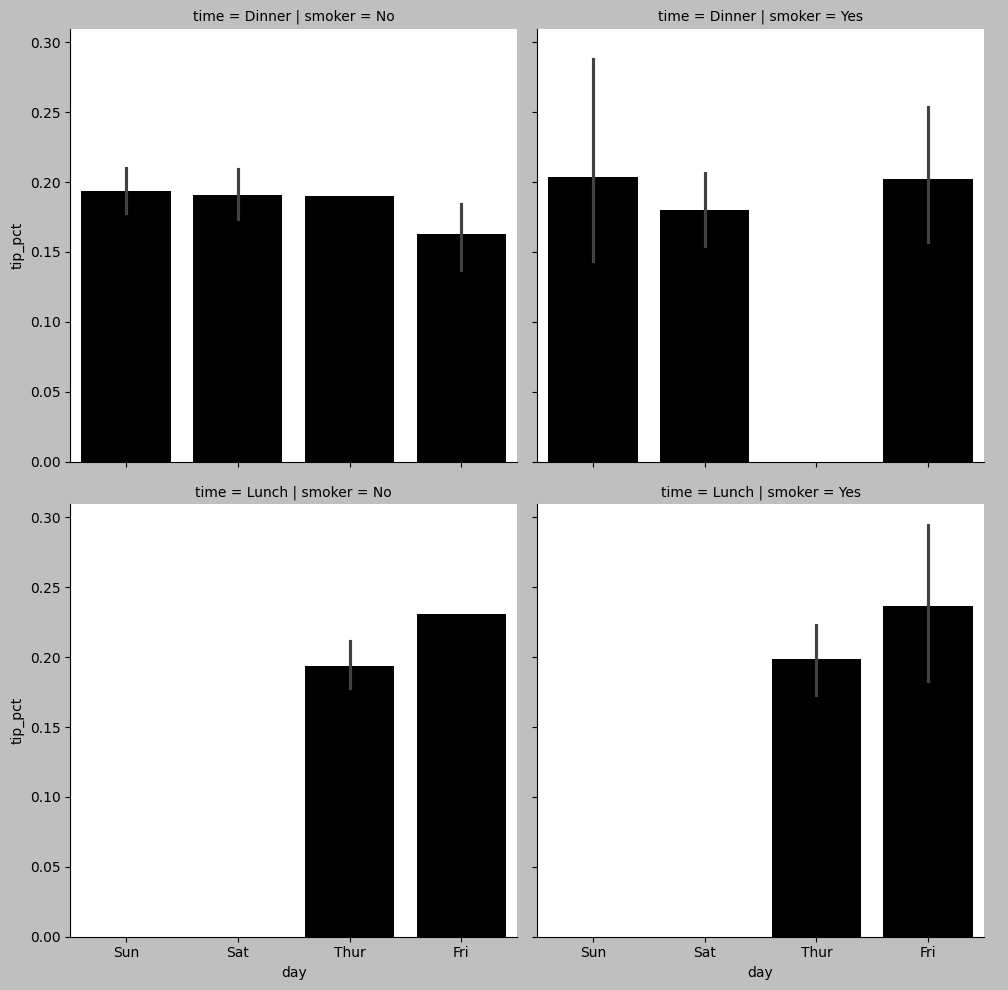

In [56]:
sns.catplot (x="day",y="tip_pct",row = "time",col = "smoker", kind = "bar",data = tips [tips.tip_pct<1])

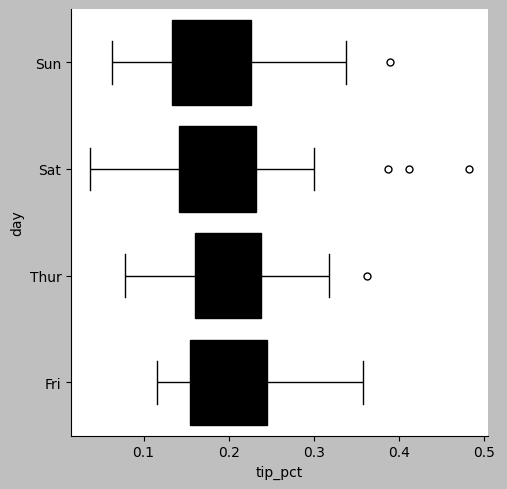

In [57]:
sns.catplot (x="tip_pct",y= "day", kind = "box", data = tips [tips.tip_pct<0.5]);